In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('insurance_cleaned.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


In [4]:
## Independent and dependent features

X=df.drop('charges',axis=1)
y=df['charges']


In [5]:
## Test train split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [6]:
## Feature selection based on correlation

X_train.corr()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.012385,0.111325,0.055070,-0.037916,-0.012805,0.016715,-0.023557,0.020113
sex,-0.012385,1.000000,0.001931,0.016610,0.054671,0.010928,0.031963,-0.025798,-0.016700
bmi,0.111325,0.001931,1.000000,-0.003459,-0.001499,-0.154166,-0.109244,0.238183,0.022136
children,0.055070,0.016610,-0.003459,1.000000,0.025488,0.009031,0.038969,-0.032380,-0.015102
smoker,-0.037916,0.054671,-0.001499,0.025488,1.000000,0.013951,-0.031689,0.044016,-0.027094
region_northeast,-0.012805,0.010928,-0.154166,0.009031,0.013951,1.000000,-0.329342,-0.340872,-0.330229
region_northwest,0.016715,0.031963,-0.109244,0.038969,-0.031689,-0.329342,1.000000,-0.336343,-0.325842
region_southeast,-0.023557,-0.025798,0.238183,-0.032380,0.044016,-0.340872,-0.336343,1.000000,-0.337249
region_southwest,0.020113,-0.016700,0.022136,-0.015102,-0.027094,-0.330229,-0.325842,-0.337249,1.000000


<Axes: >

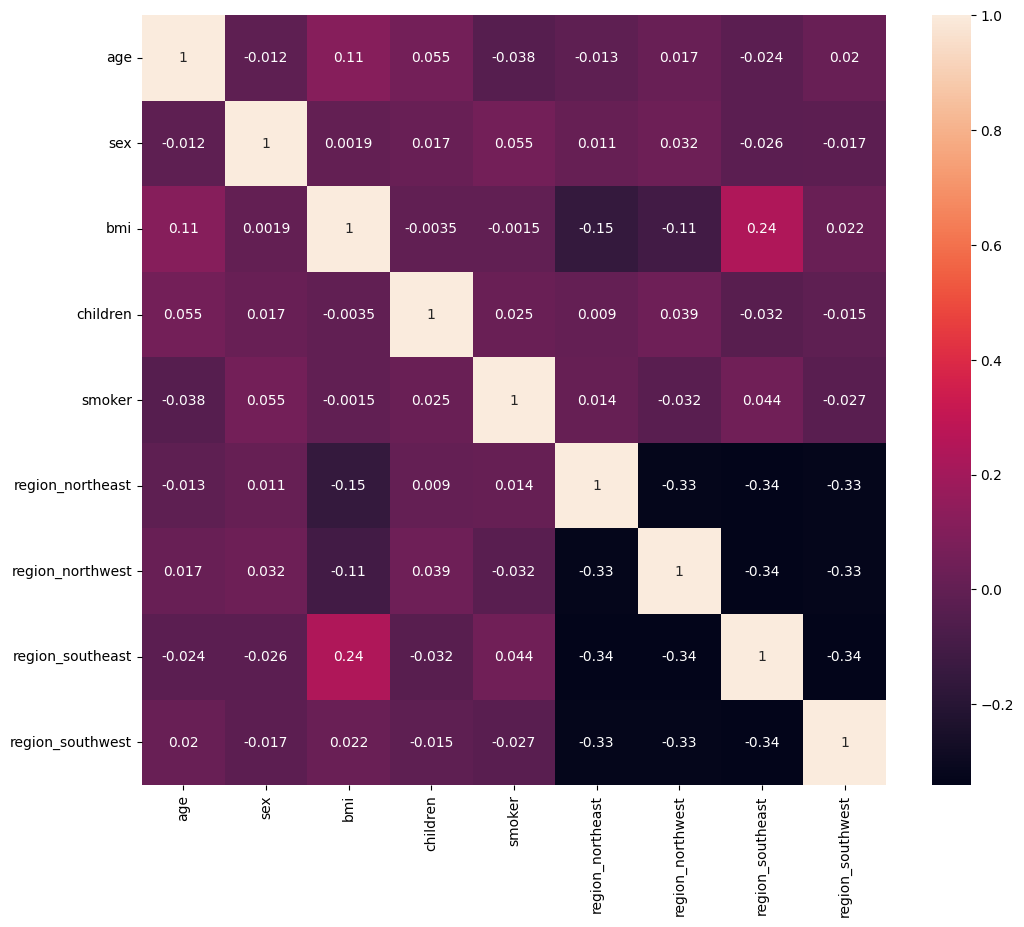

In [7]:
## Check for multicolinearity

plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

## there is no multicolinearity

In [8]:
## Standardisation

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [9]:
X_train_scaled

array([[-1.08716652,  0.99106682, -1.14087456, ...,  1.75420517,
        -0.59001549, -0.57159389],
       [-0.80210593, -1.0090137 , -0.66584152, ..., -0.57005875,
         1.69487075, -0.57159389],
       [ 0.83699246,  0.99106682,  1.52879447, ..., -0.57005875,
        -0.59001549,  1.74949385],
       ...,
       [ 1.33584849,  0.99106682, -0.8879673 , ..., -0.57005875,
        -0.59001549, -0.57159389],
       [-0.1607196 , -1.0090137 ,  2.84324666, ..., -0.57005875,
        -0.59001549,  1.74949385],
       [ 1.12205304,  0.99106682, -0.10179179, ..., -0.57005875,
        -0.59001549,  1.74949385]], shape=(1003, 9))

Text(0.5, 1.0, 'X_train after Scaling')

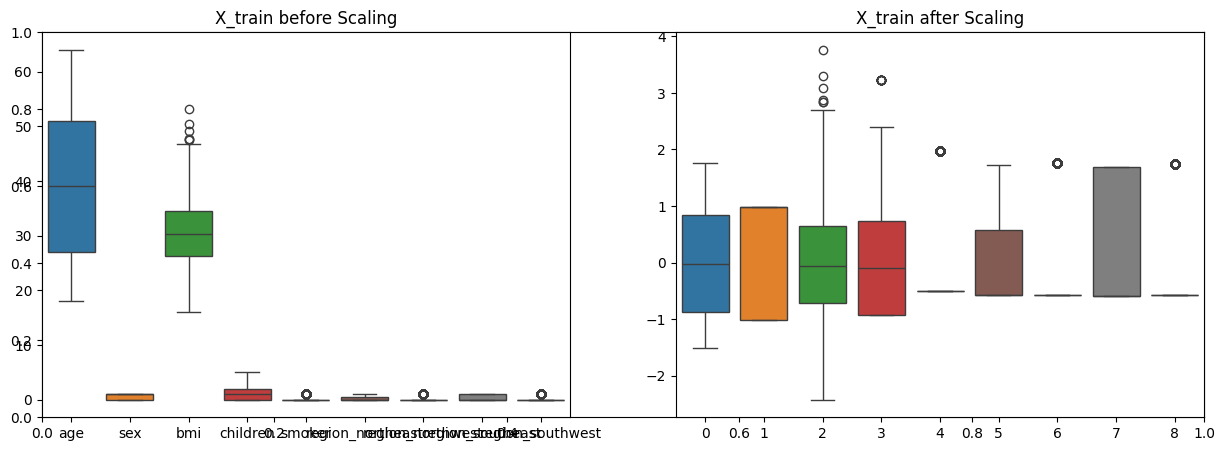

In [10]:
## Box plots to understand effect of standard scaler

plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after Scaling")


## Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train_scaled,y_train)

LinearRegression()

Mean Absolute Error  4243.654116653146
Mean Square Error:  35117755.73613632
R2 score:  0.7672642952734356


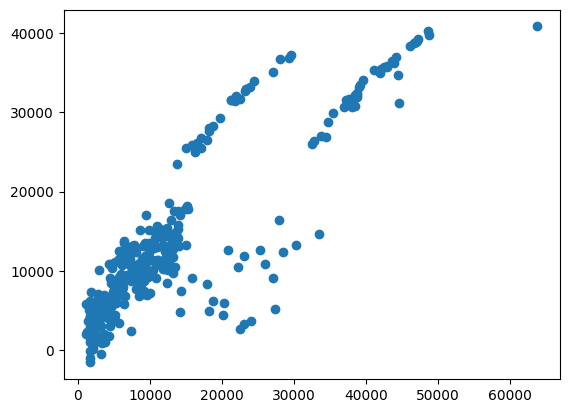

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
y_pred=regression.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean Absolute Error ", mae)
print("Mean Square Error: ",mse)
print("R2 score: ",score)
plt.scatter(y_test,y_pred)  ## if linear relationship then good model


## Ridge Regression

Mean Absolute Error  4245.2092742423265
Mean Square Error:  35123253.614371955
R2 score:  0.7672278592159812


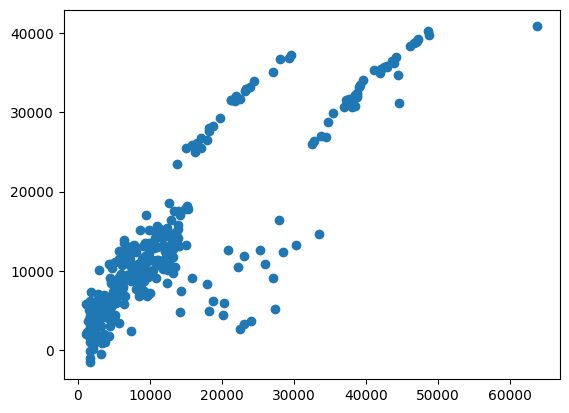

In [13]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error ", mae)
print("Mean Square Error: ",mse)
print("R2 score: ",score)
plt.scatter(y_test,y_pred)  ## if linear relationship then good model

## Lasso Regression

Mean Absolute Error  4243.630246360704
Mean Square Error:  35119002.838009425
R2 score:  0.7672560303622186


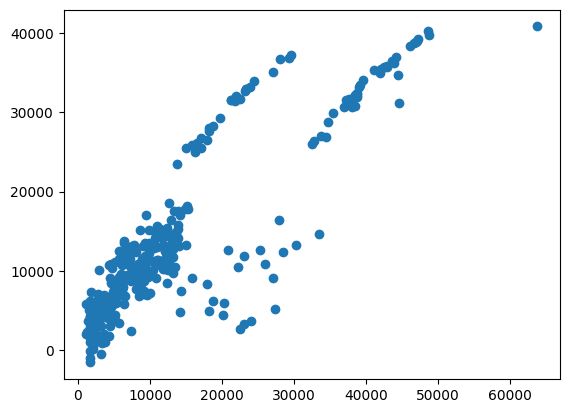

In [14]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error ", mae)
print("Mean Square Error: ",mse)
print("R2 score: ",score)
plt.scatter(y_test,y_pred)  ## if linear relationship then good model

## ElasticNet Regression

Mean Absolute Error  5242.304009350185
Mean Square Error:  49131328.9582259
R2 score:  0.6743922204151818


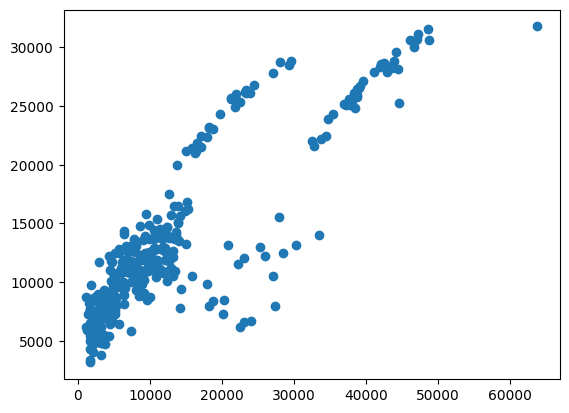

In [15]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error ", mae)
print("Mean Square Error: ",mse)
print("R2 score: ",score)
plt.scatter(y_test,y_pred)  ## if linear relationship then good model

## Cross Validation Lasso

Mean Absolute Error  4252.200897262712
Mean Square Error:  35373619.60411466
R2 score:  0.7655686101027934


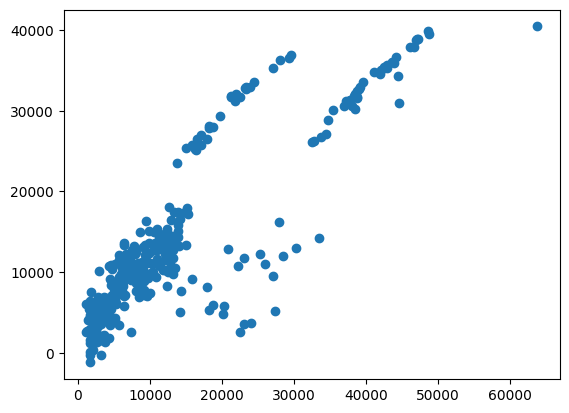

In [16]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=10)
lassocv.fit(X_train_scaled,y_train)
y_pred=lassocv.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error ", mae)
print("Mean Square Error: ",mse)
print("R2 score: ",score)

plt.scatter(y_test,y_pred)

## Pickling ML Model and scaler

In [17]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(lasso,open('lasso.pkl','wb'))